In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
             [2, 3, 4]])

B = np.array([[0, 1],
             [2, 3],
             [4, 5]])

C = np.array([[0, 1],
             [2, 3],
             [4, 5],
             [0, 1],
             [2, 3],
             [4, 5]])

print('A is a {} matrix'.format(A.shape))
print('B is a {} matrix'.format(B.shape))
print('C is a {} matrix'.format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise Operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [14]:
# tensors of different shape cannot be added or mulitplied
# A + B
# A * B

### Dot Product

In [15]:
A.shape

(2, 3)

In [16]:
B.shape

(3, 2)

In [17]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [18]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [19]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [20]:
C.shape

(6, 2)

In [21]:
A.shape

(2, 3)

In [22]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [23]:
# A.dot(C)

## Gradient Descent

In [24]:
df = pd.read_csv('./data/banknotes.csv')

In [25]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [26]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [27]:
import seaborn as sns

C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

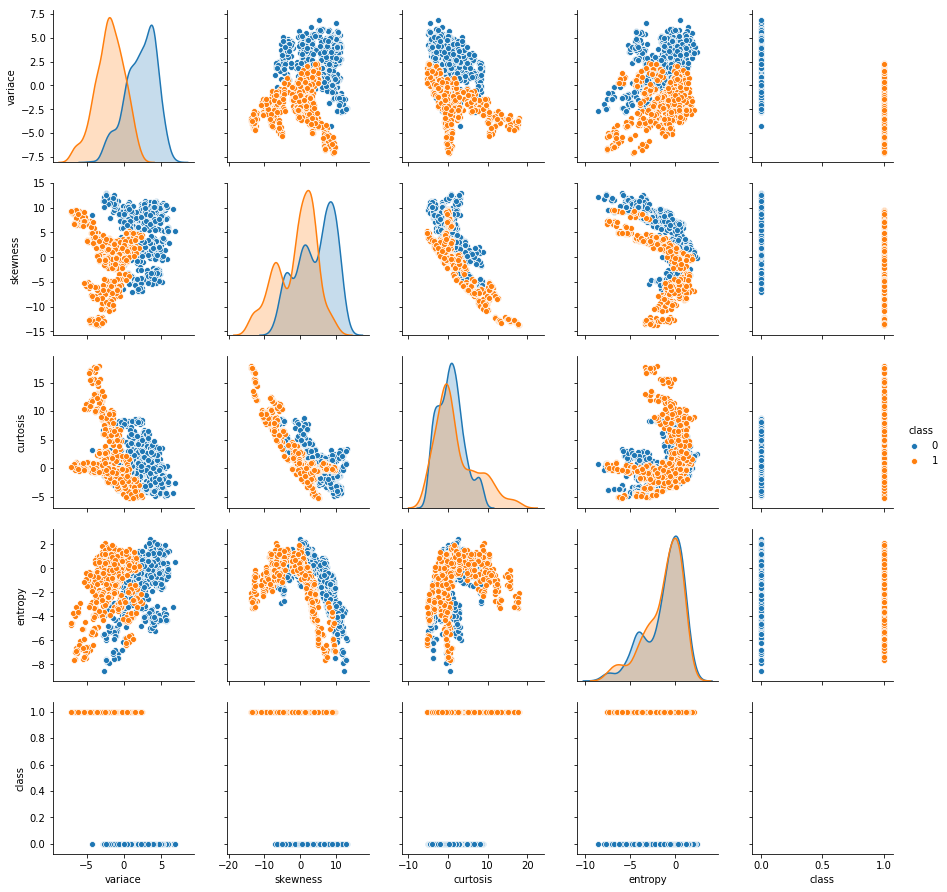

In [28]:
sns.pairplot(df, hue='class')

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [30]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [31]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0

array([0.99344978, 0.9868709 , 0.99562363])

### Logistic Regression Model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42)

In [33]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [34]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s 453us/step - loss: 0.4250 - acc: 0.8292
Epoch 2/10
960/960 [==============================] - 0s 52us/step - loss: 0.4132 - acc: 0.8385
Epoch 3/10
960/960 [==============================] - 0s 168us/step - loss: 0.4024 - acc: 0.8406
Epoch 4/10
960/960 [==============================] - 0s 55us/step - loss: 0.3926 - acc: 0.8479
Epoch 5/10
960/960 [==============================] - 0s 39us/step - loss: 0.3835 - acc: 0.8510
Epoch 6/10
960/960 [==============================] - 0s 46us/step - loss: 0.3751 - acc: 0.8573
Epoch 7/10
960/960 [==============================] - 0s 43us/step - loss: 0.3673 - acc: 0.8635
Epoch 8/10
960/960 [==============================] - 0s 45us/step - loss: 0.3599 - acc: 0.8687
Epoch 9/10
960/960 [==============================] - 0s 41us/step - loss: 0.3531 - acc: 0.8698
Epoch 10/10
412/412 [==============================] - 0s 148us/step


In [35]:
history

In [36]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5, 1.0, 'Test accuracy: 86.9 %')

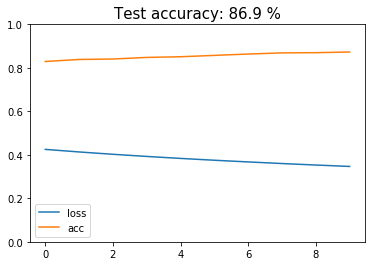

In [37]:
historydf.plot(ylim=(0,1))
plt.title('Test accuracy: {:3.1f} %'.format(
    result[1]*100), fontsize=15)

### Learning Rates

In [38]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [39]:
historydf = pd.concat(dflist, axis=1)

In [40]:
historydf

,loss,acc,loss,acc,loss,acc,loss,acc
0,0.435501,0.925000,0.531281,0.839583,0.417561,0.913542,0.348501,0.865625
1,0.397210,0.941667,0.338267,0.937500,0.264841,0.941667,0.133374,0.965625
2,0.368228,0.953125,0.280847,0.936458,0.211894,0.956250,0.097784,0.972917
3,0.345344,0.957292,0.246270,0.943750,0.180178,0.958333,0.081931,0.977083
4,0.326738,0.953125,0.221413,0.950000,0.158514,0.962500,0.072135,0.978125
5,0.311172,0.955208,0.202137,0.953125,0.142758,0.968750,0.066051,0.980208
6,0.297866,0.956250,0.186758,0.959375,0.130634,0.968750,0.061394,0.980208
7,0.286324,0.957292,0.174051,0.961458,0.121045,0.968750,0.057826,0.980208
8,0.276131,0.954167,0.163350,0.962500,0.113294,0.969792,0.054919,0.981250
9,0.267028,0.954167,0.154216,0.964583,0.106918,0.971875,0.052909,0.981250


In [41]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                names=['learning_rate', 'metric'])
historydf.columns = idx

In [42]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss       acc      loss       acc      loss       acc   
0              0.435501  0.925000  0.531281  0.839583  0.417561  0.913542   
1              0.397210  0.941667  0.338267  0.937500  0.264841  0.941667   
2              0.368228  0.953125  0.280847  0.936458  0.211894  0.956250   
3              0.345344  0.957292  0.246270  0.943750  0.180178  0.958333   
4              0.326738  0.953125  0.221413  0.950000  0.158514  0.962500   
5              0.311172  0.955208  0.202137  0.953125  0.142758  0.968750   
6              0.297866  0.956250  0.186758  0.959375  0.130634  0.968750   
7              0.286324  0.957292  0.174051  0.961458  0.121045  0.968750   
8              0.276131  0.954167  0.163350  0.962500  0.113294  0.969792   
9              0.267028  0.954167  0.154216  0.964583  0.106918  0.971875   

learning_rate      0.50            
metric             loss       acc  
0              0.348501  0.865625  
1              0.133374  0.965625  
2              0.097784  0.972917  
3              0.081931  0.977083  
4              0.072135  0.978125  
5              0.066051  0.980208  
6              0.061394  0.980208  
7              0.057826  0.980208  
8              0.054919  0.981250  
9              0.052909  0.981250

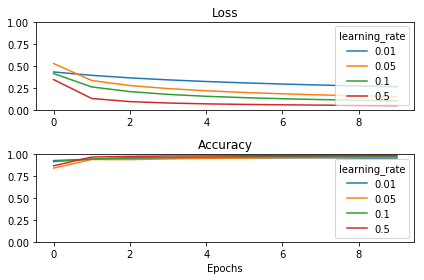

In [43]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.tight_layout()

### Batch Sizes

In [44]:
dflist = []
batch_sizes = [16, 32, 64, 128]

for bs in batch_sizes:
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])
    h = model.fit(X_train, y_train, epochs=10, batch_size=bs, 
                 verbose = 0)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [45]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [46]:
historydf

batch_size       16                  32                  64             \
metric          loss       acc      loss       acc      loss       acc   
0           0.409731  0.900000  0.883357  0.330208  1.041435  0.454167   
1           0.380192  0.907292  0.820141  0.388542  1.002819  0.460417   
2           0.358198  0.909375  0.766329  0.434375  0.965889  0.466667   
3           0.340701  0.910417  0.720319  0.483333  0.930654  0.470833   
4           0.326228  0.911458  0.680724  0.558333  0.896933  0.480208   
5           0.313835  0.919792  0.646491  0.618750  0.864976  0.488542   
6           0.303040  0.921875  0.616569  0.658333  0.834633  0.495833   
7           0.293381  0.922917  0.590296  0.694792  0.805935  0.502083   
8           0.284660  0.925000  0.567055  0.733333  0.778786  0.510417   
9           0.276656  0.927083  0.546350  0.752083  0.753233  0.512500   

batch_size       128            
metric          loss       acc  
0           0.581620  0.666667  
1           0.576869  0.677083  
2           0.572147  0.678125  
3           0.567570  0.680208  
4           0.563067  0.683333  
5           0.558676  0.689583  
6           0.554322  0.692708  
7           0.550118  0.695833  
8           0.545978  0.697917  
9           0.541863  0.704167

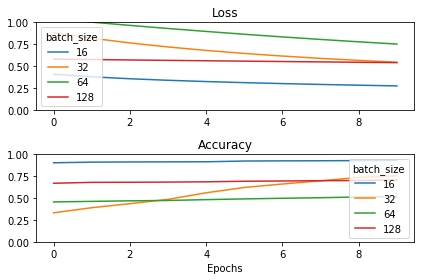

In [47]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.tight_layout()

### Optimizers

In [48]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [49]:
dflist = []

optimizers = ['SGD(lr=0.01)',
             'SGD(lr=0.01, momentum=0.3)',
             'SGD(lr=0.01, momentum=0.3, nesterov=True)',
             'Adam(lr=0.01)',
             'Adagrad(lr=0.01)',
             'RMSprop(lr=0.01)']

for opt_name in optimizers:
    
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4, ), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer=eval(opt_name),
                 metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, 
                 verbose=0)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [50]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                names=['optimizers', 'metric'])
historydf.columns = idx

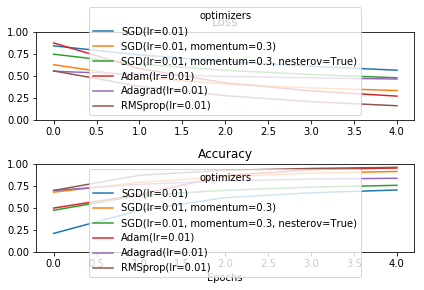

In [51]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.tight_layout()

### Initialization

In [52]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
               'he_normal', 'lecun_uniform']

for init in initializers:
    
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4, ),
                   kernel_initializer=init,
                   activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])
    
    h = model.fit(X_train, y_train, batch_size=16, epochs=5,
                 verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [53]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                names=['initializers', 'metric'])

historydf.columns = idx

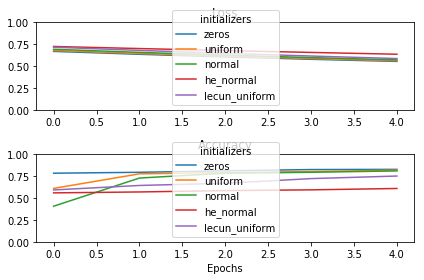

In [54]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.tight_layout()

### Inner Layer Representation

In [55]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4, ), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.01),
             metrics=['accuracy'])
h = model.fit(X_train, y_train, batch_size=16, epochs=20,
             verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s 520us/step - loss: 0.7232 - acc: 0.5893 - val_loss: 0.6784 - val_acc: 0.5799
Epoch 2/20
672/672 [==============================] - 0s 65us/step - loss: 0.6239 - acc: 0.6741 - val_loss: 0.6117 - val_acc: 0.6840
Epoch 3/20
672/672 [==============================] - 0s 66us/step - loss: 0.5425 - acc: 0.7530 - val_loss: 0.5198 - val_acc: 0.7674
Epoch 4/20
672/672 [==============================] - 0s 71us/step - loss: 0.4382 - acc: 0.8199 - val_loss: 0.4028 - val_acc: 0.8438
Epoch 5/20
672/672 [==============================] - 0s 68us/step - loss: 0.3187 - acc: 0.8720 - val_loss: 0.2806 - val_acc: 0.9097
Epoch 6/20
672/672 [==============================] - 0s 73us/step - loss: 0.2191 - acc: 0.9092 - val_loss: 0.1819 - val_acc: 0.9236
Epoch 7/20
672/672 [==============================] - 0s 69us/step - loss: 0.1398 - acc: 0.9449 - val_loss: 0.1014 - val_acc: 0.9722
Epoch 8/20
672/672 [==

In [56]:
result

[0.028081949831899797, 0.9878640776699029]

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.layers

In [59]:
inp = model.layers[0].input
out = model.layers[0].output

In [60]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [61]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [62]:
features_function = K.function([inp], [out])

In [63]:
features_function

In [64]:
features = features_function([X_test])[0]

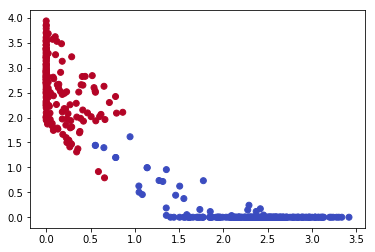

In [65]:
plt.scatter(features[:, 0], features[:,1], c=y_test,
           cmap='coolwarm')

In [66]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4, ), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.01),
             metrics=['accuracy'])

412/412 [==============================] - 0s 25us/step


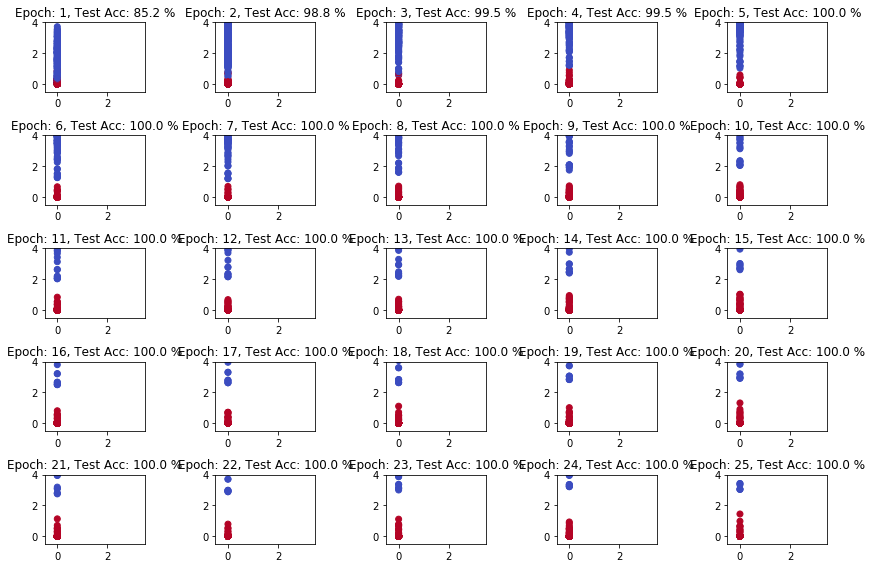

In [67]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])
plt.figure(figsize=(12, 8))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, 
                 verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:,0], features[:, 1], c=y_test,
               cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i,
                                        test_accuracy * 100.0))

plt.tight_layout()

In [69]:
df = pd.read_csv('./data/wines.csv')

In [70]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
y = df['Class']

In [72]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [73]:
y_cat = pd.get_dummies(y)

In [74]:
y_cat.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [75]:
X = df.drop('Class', axis=1)

In [76]:
X.shape

(178, 13)

C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

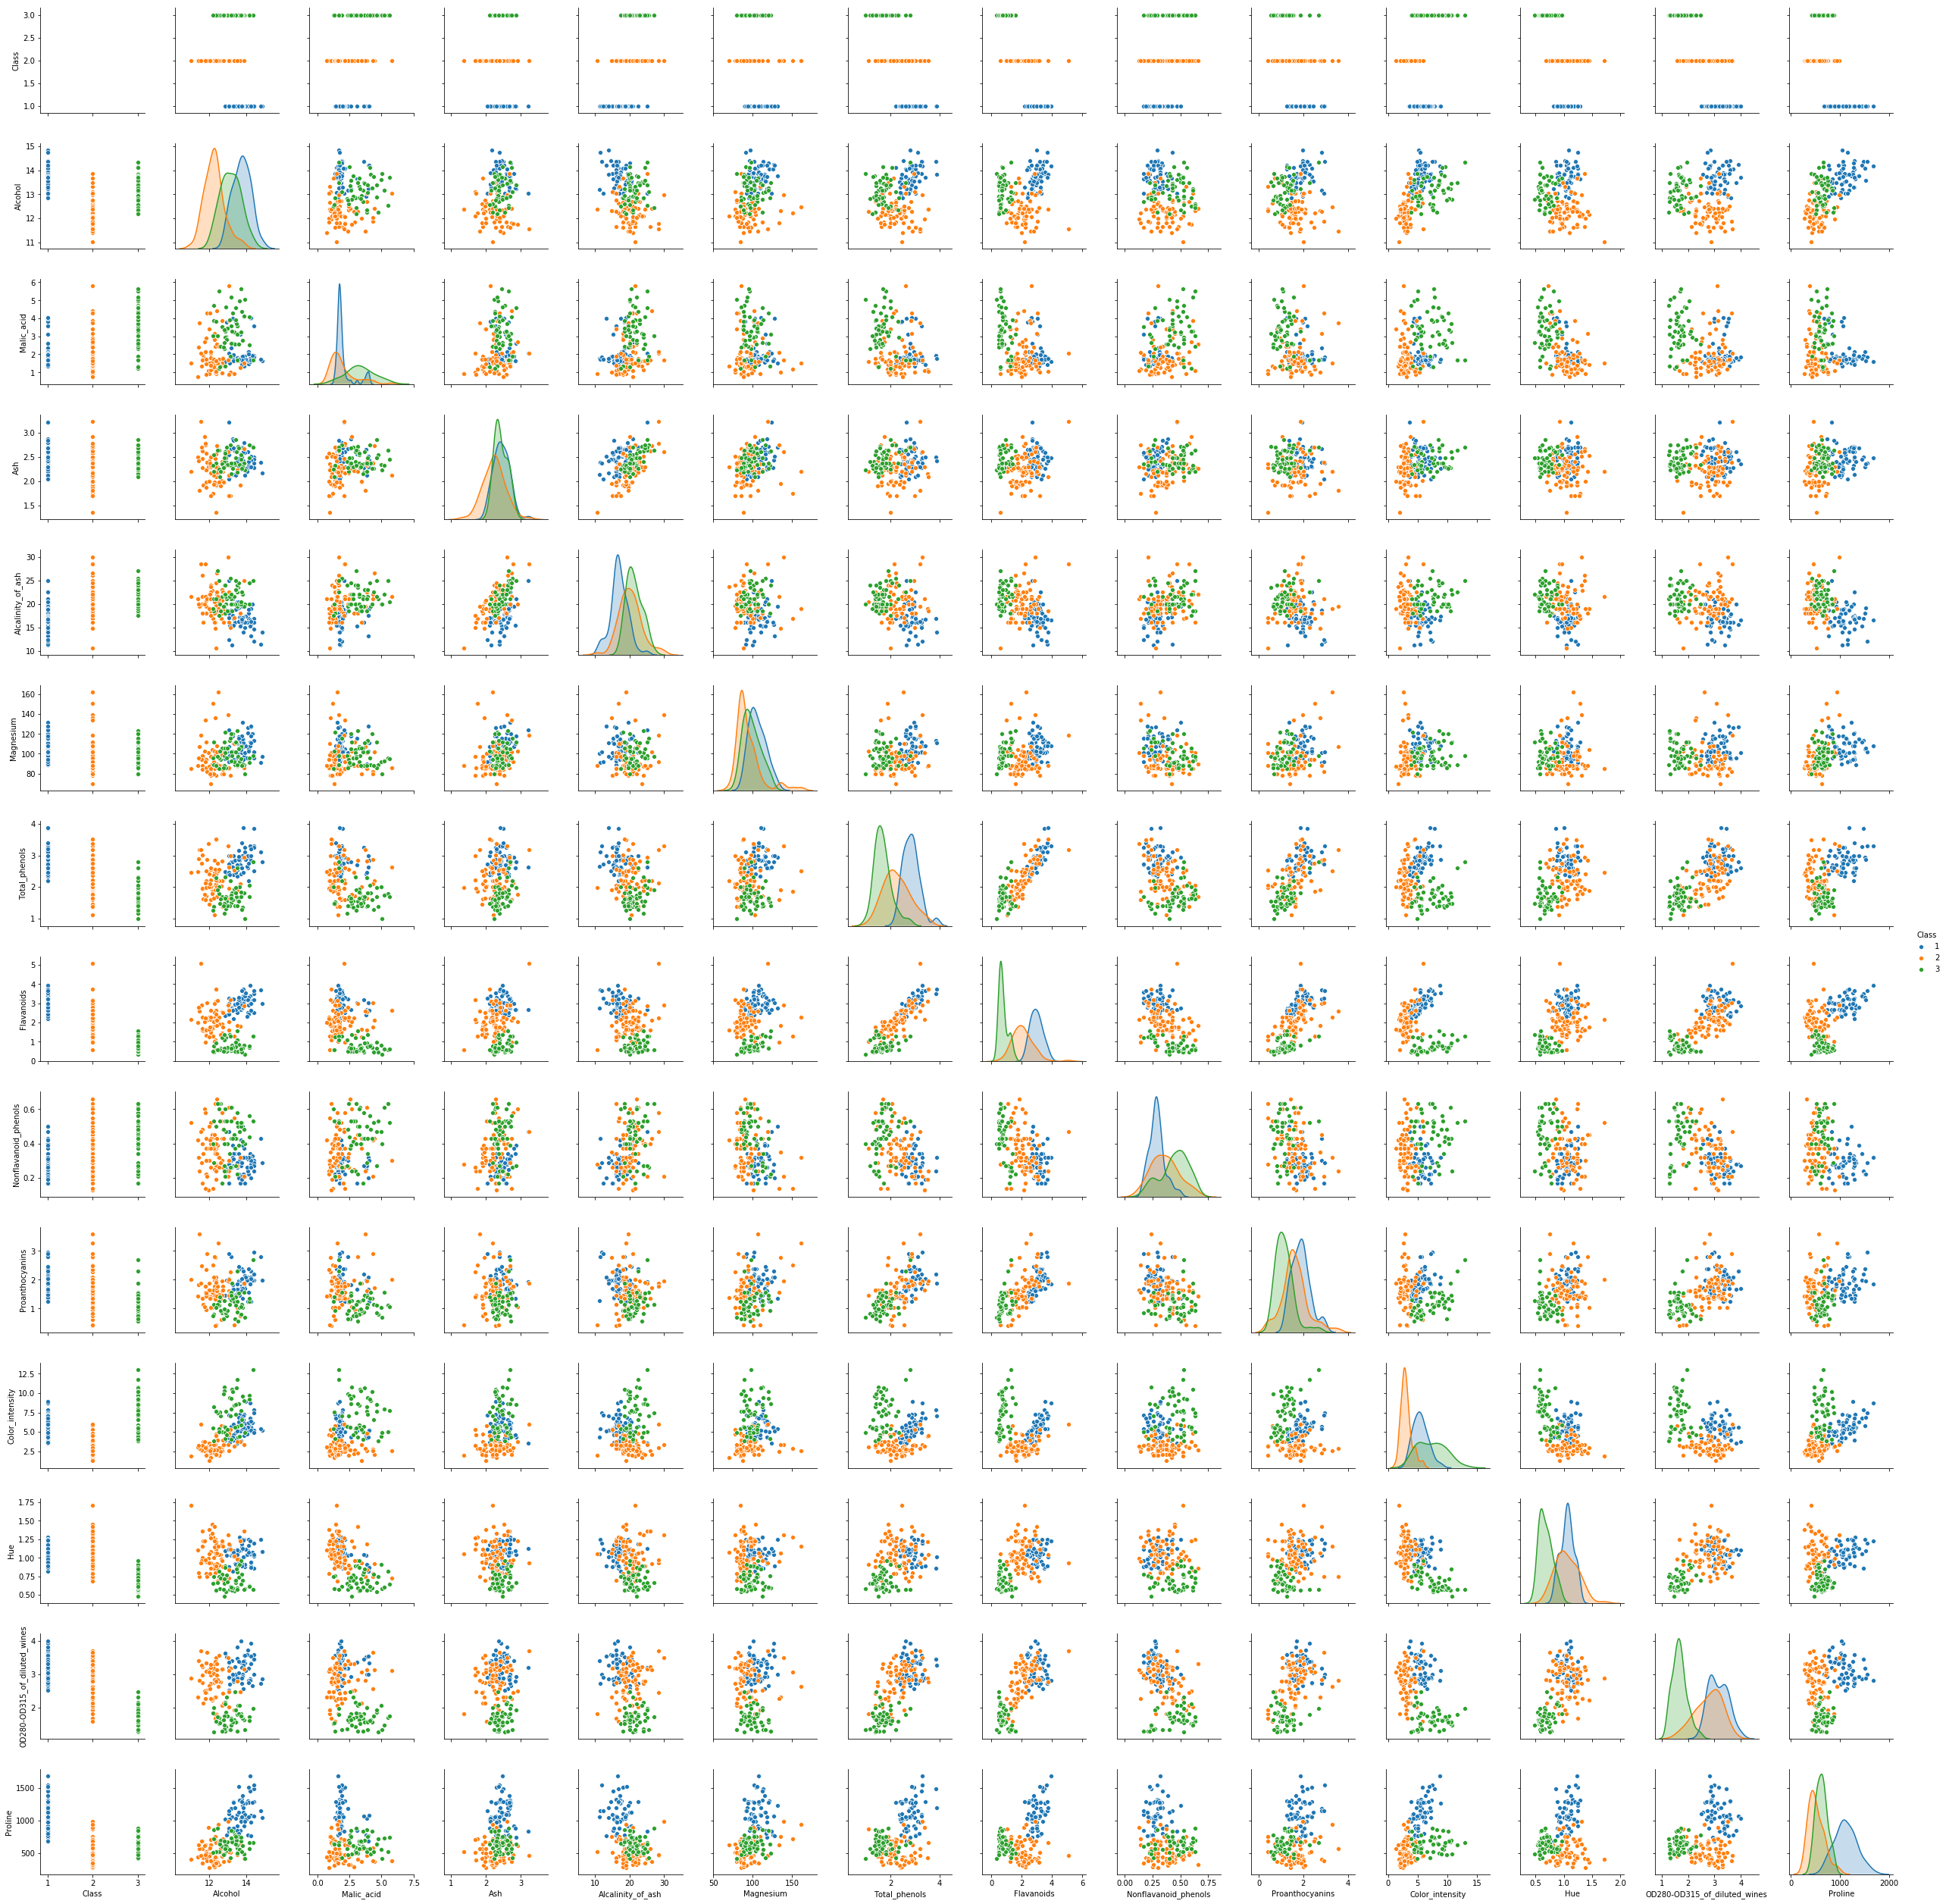

In [77]:
sns.pairplot(df, hue='Class')

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc = StandardScaler()

In [81]:
Xsc = sc.fit_transform(X)

C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
import keras.backend as K

In [83]:
K.clear_session()
model = Sequential()
model.add(Dense(5, input_shape=(13, ),
               kernel_initializer='he_normal',
               activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.1),
             'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
         batch_size = 8,
         epochs = 10,
         verbose = 1,
         validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/10
142/142 [==============================] - 0s 2ms/step - loss: 0.3731 - acc: 0.8169 - val_loss: 0.1092 - val_acc: 1.0000
Epoch 2/10
142/142 [==============================] - 0s 129us/step - loss: 0.1330 - acc: 0.9577 - val_loss: 0.1048 - val_acc: 0.9722
Epoch 3/10
142/142 [==============================] - 0s 150us/step - loss: 0.0834 - acc: 0.9648 - val_loss: 0.0450 - val_acc: 0.9722
Epoch 4/10
142/142 [==============================] - 0s 136us/step - loss: 0.0608 - acc: 0.9718 - val_loss: 0.0096 - val_acc: 1.0000
Epoch 5/10
142/142 [==============================] - 0s 161us/step - loss: 0.0253 - acc: 0.9930 - val_loss: 0.0068 - val_acc: 1.0000
Epoch 6/10
142/142 [==============================] - 0s 143us/step - loss: 0.0478 - acc: 0.9789 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 7/10
142/142 [==============================] - 0s 143us/step - loss: 0.0079 - acc: 0.9930 - val_loss: 0.1037 - val_acc: 0.9444
Epoch 8/10
142/142 

In [85]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13, ),
               kernel_initializer='he_normal',
               activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.05),
             'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
         batch_size=16,
         epochs=20,
         verbose=1)

Epoch 1/20
178/178 [==============================] - 0s 2ms/step - loss: 0.5227 - acc: 0.8146
Epoch 2/20
178/178 [==============================] - 0s 173us/step - loss: 0.2372 - acc: 0.9382
Epoch 3/20
178/178 [==============================] - 0s 178us/step - loss: 0.1364 - acc: 0.9775
Epoch 4/20
178/178 [==============================] - 0s 167us/step - loss: 0.1494 - acc: 0.9494
Epoch 5/20
178/178 [==============================] - 0s 217us/step - loss: 0.0705 - acc: 0.9888
Epoch 6/20
178/178 [==============================] - 0s 173us/step - loss: 0.0795 - acc: 0.9775
Epoch 7/20
178/178 [==============================] - 0s 178us/step - loss: 0.0169 - acc: 1.0000
Epoch 8/20
178/178 [==============================] - 0s 164us/step - loss: 0.0101 - acc: 1.0000
Epoch 9/20
178/178 [==============================] - 0s 203us/step - loss: 0.0061 - acc: 1.0000
Epoch 10/20
178/178 [==============================] - 0s 170us/step - loss: 0.0037 - acc: 1.0000
Epoch 11/20
178/178 [==========

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [87]:
inp = model.layers[0].input
out = model.layers[2].output

In [88]:
features_function = K.function([inp], [out])

In [89]:
features = features_function([Xsc])[0]

In [90]:
features.shape

(178, 2)

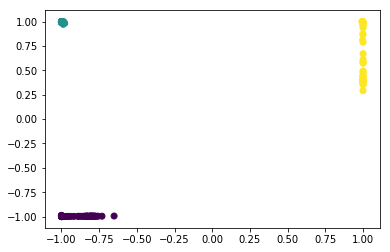

In [91]:
plt.scatter(features[:, 0], features[:, 1], c=y)

In [92]:
from keras.layers import Input
from keras.models import Model

In [94]:
K.clear_session()

inputs = Input(shape=(13, ))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                      activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)
model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05),
             'categorical_crossentropy',
             metrics=['accuracy'])
model.fit(Xsc, y_cat.values, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
178/178 [==============================] - 0s 1ms/step - loss: 0.6364 - acc: 0.7865
Epoch 2/20
178/178 [==============================] - 0s 64us/step - loss: 0.1778 - acc: 0.9831
Epoch 3/20
178/178 [==============================] - 0s 64us/step - loss: 0.1337 - acc: 0.9719
Epoch 4/20
178/178 [==============================] - 0s 64us/step - loss: 0.0757 - acc: 0.9775
Epoch 5/20
178/178 [==============================] - 0s 72us/step - loss: 0.0510 - acc: 0.9944
Epoch 6/20
178/178 [==============================] - 0s 89us/step - loss: 0.0420 - acc: 0.9944
Epoch 7/20
178/178 [==============================] - 0s 72us/step - loss: 0.0495 - acc: 0.9831
Epoch 8/20
178/178 [==============================] - 0s 69us/step - loss: 0.0285 - acc: 0.9944
Epoch 9/20
178/178 [==============================] - 0s 67us/step - loss: 0.0442 - acc: 0.9888
Epoch 10/20
178/178 [==============================] - 0s 84us/step - loss: 0.0409 - acc: 0.9888
Epoch 11/20
178/178 [===================

In [95]:
features_function = K.function([inputs], [second_to_last])

In [96]:
features = features_function([Xsc])[0]

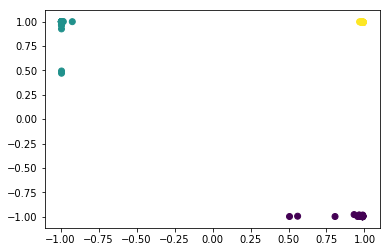

In [97]:
plt.scatter(features[:, 0], features[:, 1], c=y)

In [98]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [99]:
checkpointer = ModelCheckpoint(filepath='/tmp/udemy/weights.hdf5',
                              verbose=1, save_best_only=True)

In [101]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                           patience=1, verbose=1, mode='auto')

In [102]:
tensorboard = TensorBoard(log_dir='/tmp/udemy/tensorboard/')

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, 
                        y_cat.values, test_size=0.3, random_state=42)

In [107]:
K.clear_session()

inputs = Input(shape=(13,))

x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal', 
                      activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05), 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=2,
         validation_data=(X_test, y_test),
         callbacks=[checkpointer, earlystopper, tensorboard])

Train on 124 samples, validate on 54 samples
Epoch 1/20
 - 0s - loss: 0.8533 - acc: 0.6048 - val_loss: 0.5110 - val_acc: 0.8704

Epoch 00001: val_loss improved from inf to 0.51103, saving model to /tmp/udemy/weights.hdf5
Epoch 2/20
 - 0s - loss: 0.4243 - acc: 0.9355 - val_loss: 0.3077 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.51103 to 0.30770, saving model to /tmp/udemy/weights.hdf5
Epoch 3/20
 - 0s - loss: 0.2684 - acc: 0.9758 - val_loss: 0.2354 - val_acc: 0.9815

Epoch 00003: val_loss improved from 0.30770 to 0.23541, saving model to /tmp/udemy/weights.hdf5
Epoch 4/20
 - 0s - loss: 0.1746 - acc: 1.0000 - val_loss: 0.2072 - val_acc: 0.9815

Epoch 00004: val_loss improved from 0.23541 to 0.20724, saving model to /tmp/udemy/weights.hdf5
Epoch 5/20
 - 0s - loss: 0.1274 - acc: 1.0000 - val_loss: 0.2417 - val_acc: 0.9444

Epoch 00005: val_loss did not improve from 0.20724
Epoch 00005: early stopping
